# Визуализация данных

На семинаре мы будем заниматься построением различных визуализаций. Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и сравним с результатом работы метода ближайших соседей

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [3]:
Data.shape

(891, 12)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [4]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [6]:
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [7]:
# Data.drop('Sex', inplace=True, axis=1)
Data = Data[Data['Sex'] != 'unknown']
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C


**Задание**. Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории unknown?

In [8]:
# посмотреть имена этих пассажиров
Data[Data.Sex == 'unknown'].Name

Series([], Name: Name, dtype: object)

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [9]:
Data['Sex'] = Data['Sex'].map({'male' : 0, 'female' : 1})

Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,S


Посмотрим, как влияет пол на выживаемость.

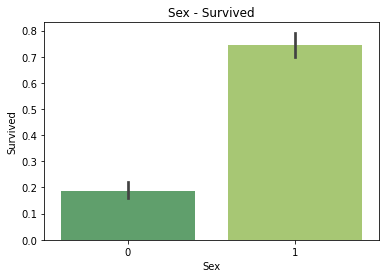

In [10]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

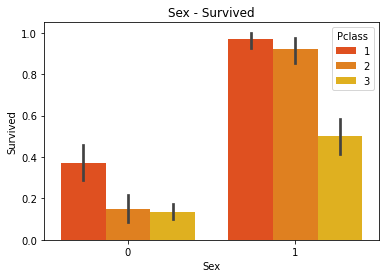

In [11]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

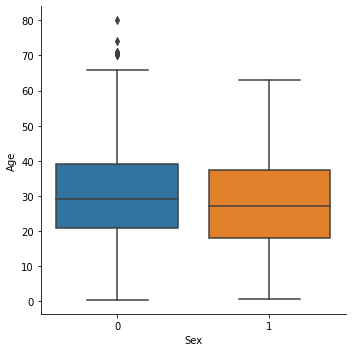

In [12]:
sns.catplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

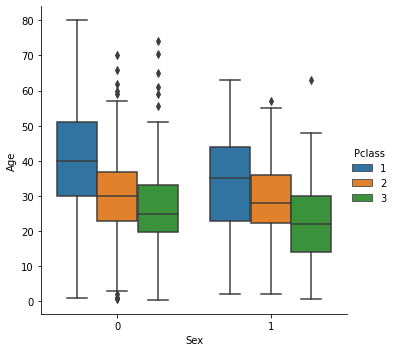

In [13]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [14]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалим из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [15]:
Data.dropna(subset=['Embarked'], inplace=True)
Data.shape

(884, 12)

**Задание 7.** Закодируем столбец Embarked с помощью OneHot-кодирования (pd.get_dummies). 

In [16]:
Data = pd.get_dummies(Data, columns=['Embarked'], drop_first=True)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,0,1


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [17]:
Data['Age'].describe()

count    709.000000
mean      29.685952
std       14.472234
min        0.420000
25%       20.500000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Заполним пропуски медианным значением Age.

In [18]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

In [19]:
Data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,448.321267,0.382353,2.308824,0.350679,29.352195,0.524887,0.376697,32.171422,0.084842,0.725113
std,255.849565,0.486237,0.835706,0.477453,12.976432,1.106172,0.791775,49.822502,0.278804,0.446710
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,227.750000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,448.500000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,669.250000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


Нарисуем распределение возраста пассажиров.

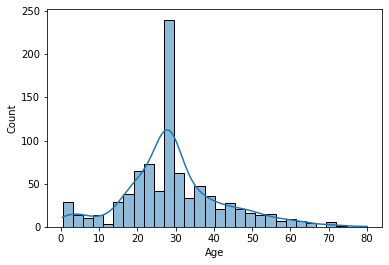

In [20]:
sns.histplot(Data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

D:\Programs\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


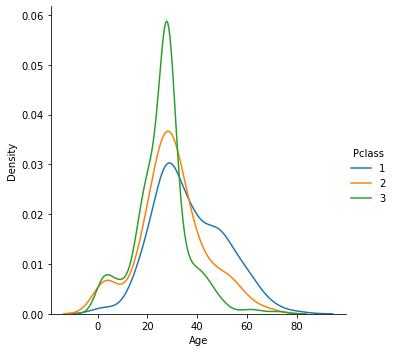

In [21]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [22]:
Data['Fare'].describe()

count    884.000000
mean      32.171422
std       49.822502
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [23]:
Data['Pclass'].value_counts()

3    487
1    214
2    183
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

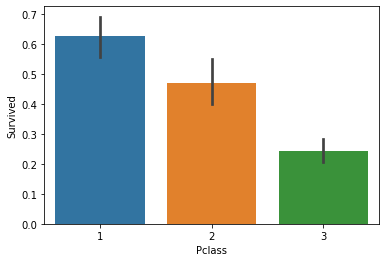

In [24]:
sns.barplot(x='Pclass', y='Survived', data=Data)
plt.show()

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [25]:
Data['SibSp'].value_counts()

0    603
1    207
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [26]:
Data['Parch'].value_counts()

0    673
1    118
2     79
3      5
5      4
4      4
6      1
Name: Parch, dtype: int64

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [27]:
Data.drop("PassengerId", axis=1, inplace=True)

In [28]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,Braund; Mr. Owen Harris,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,1,3,Heikkinen; Miss. Laina,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,113803,53.1000,C123,0,1
4,0,3,Allen; Mr. William Henry,0,35.0,0,0,373450,8.0500,NaN,0,1


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [29]:
#your code here
NumericData = Data._get_numeric_data()
NumericData

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,28.0,1,2,23.4500,0,1
889,1,1,0,26.0,0,0,30.0000,0,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

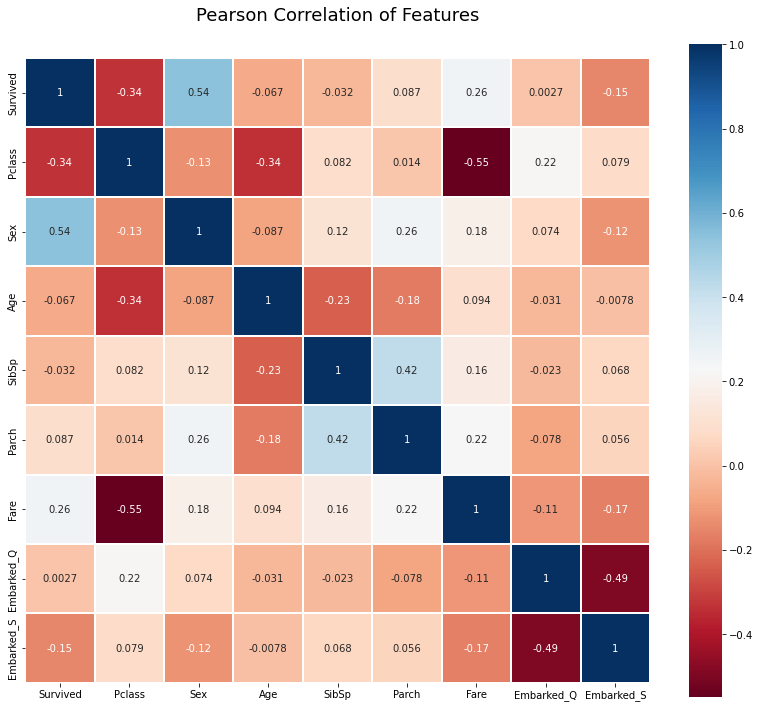

In [30]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

D:\Programs\Anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


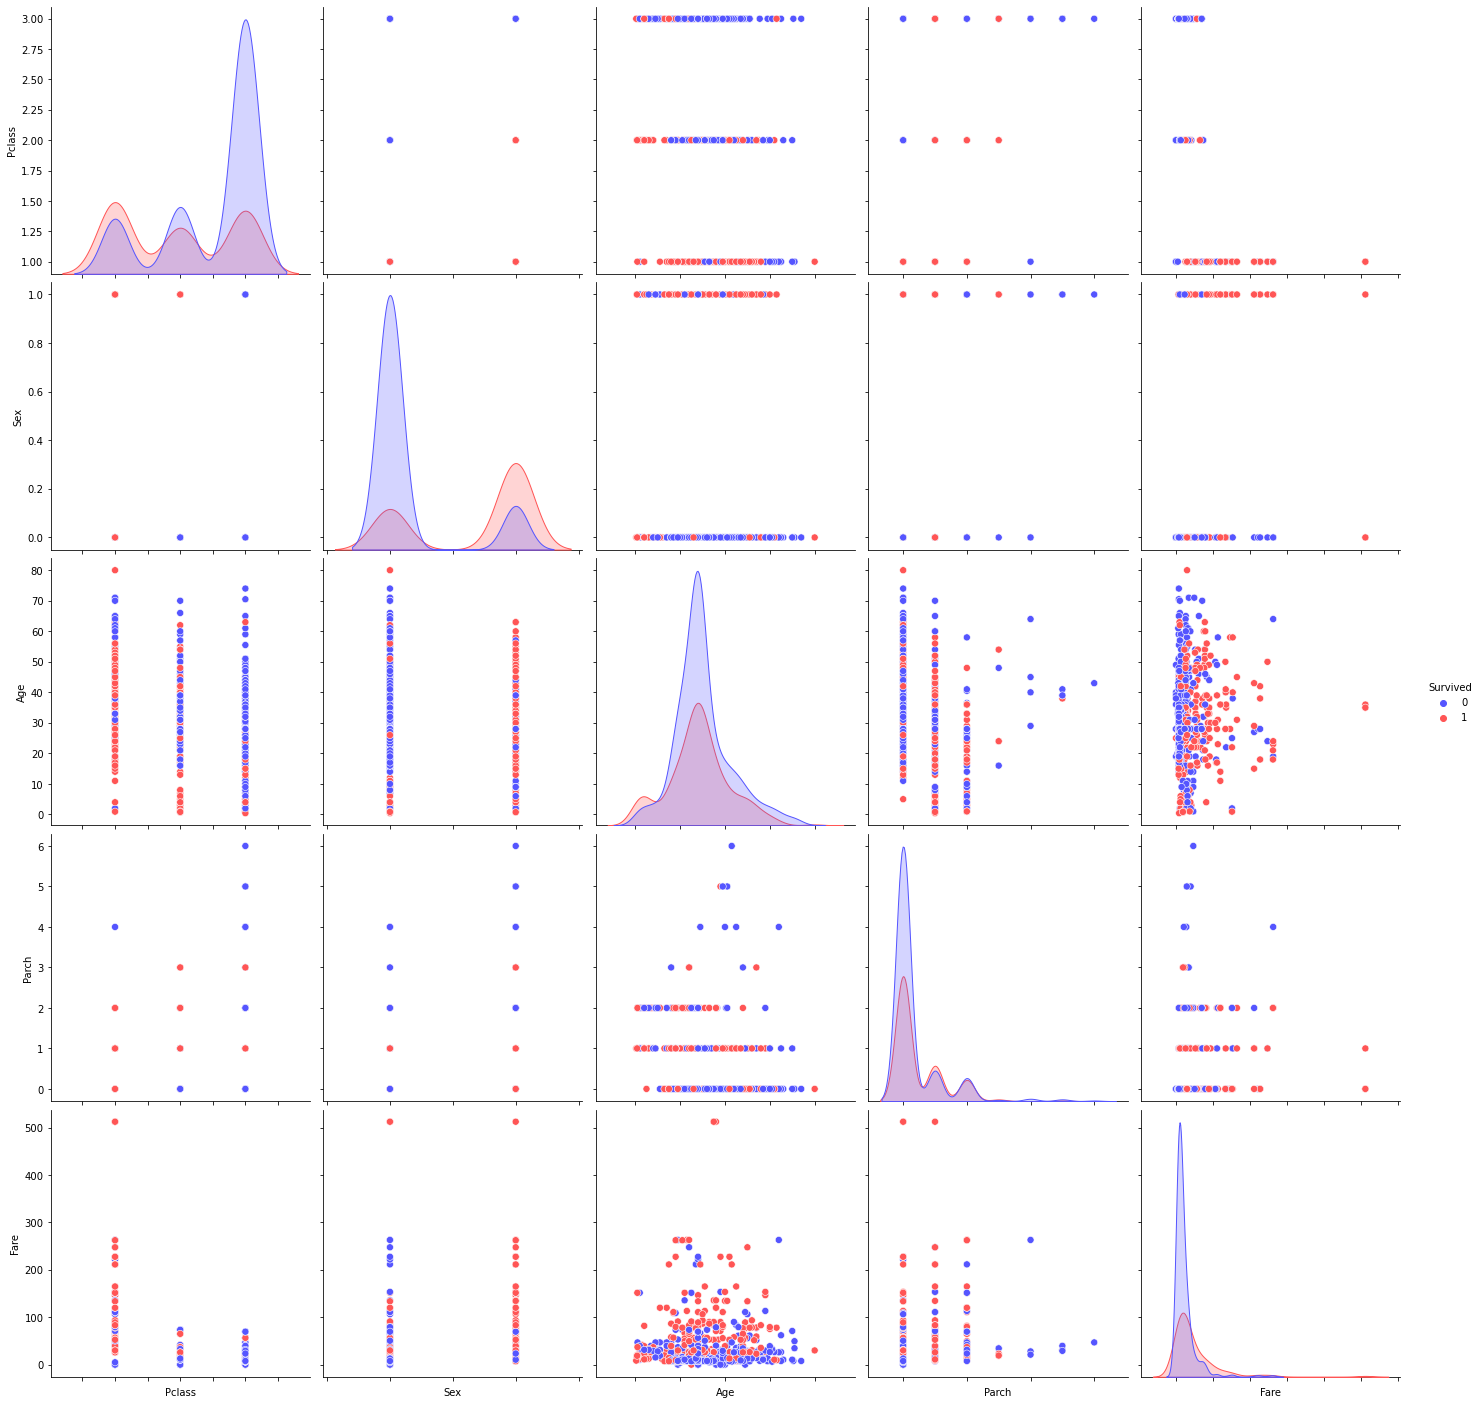

In [31]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [32]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [33]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [34]:
Data['FareBin'] = pd.cut(Data['Fare'].astype(int), 4)

Data['FareBin'].head()

0    (-0.512, 128.0]
1    (-0.512, 128.0]
2    (-0.512, 128.0]
3    (-0.512, 128.0]
4    (-0.512, 128.0]
Name: FareBin, dtype: category
Categories (4, interval[float64, right]): [(-0.512, 128.0] < (128.0, 256.0] < (256.0, 384.0] < (384.0, 512.0]]

In [35]:
Data['FareBin_Code'] = label.fit_transform(Data['FareBin'])

Data[['Fare','FareBin','FareBin_Code']].head()

,Fare,FareBin,FareBin_Code
0,7.2500,"(-0.512, 128.0]",0
1,71.2833,"(-0.512, 128.0]",0
2,7.9250,"(-0.512, 128.0]",0
3,53.1000,"(-0.512, 128.0]",0
4,8.0500,"(-0.512, 128.0]",0


Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [55]:
Data['NameLen'] = Data.Name.apply(len)
Data['FamilySize'] = Data.Parch + Data.SibSp + 1 # добавляем 1, чтобы посчитать самого человека у которого смотрим эти данные
Data['IsAlone'] = (Data.Parch + Data.SibSp).apply(lambda x: not bool(x))

**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

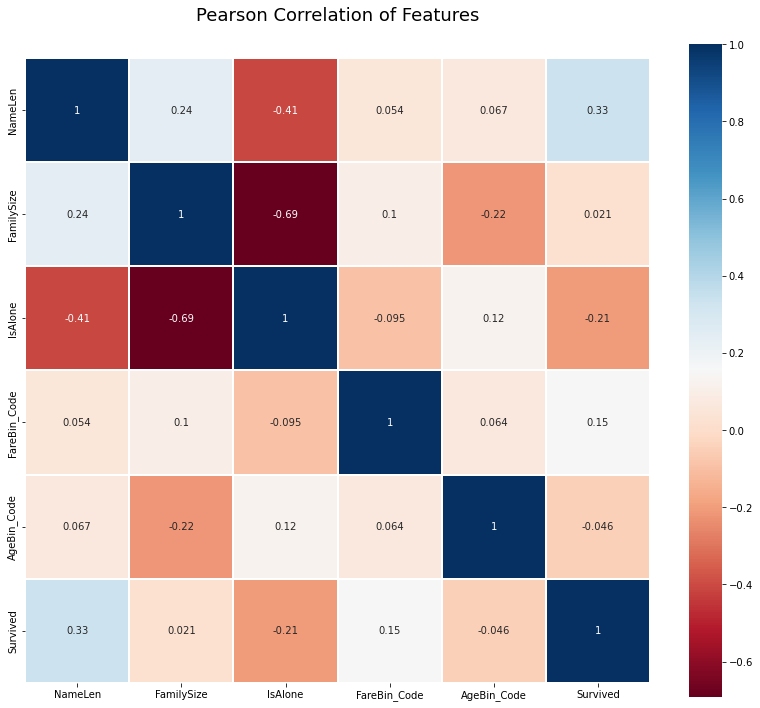

In [56]:
new_features = Data[['NameLen', 'FamilySize', 'IsAlone', 'FareBin_Code', 'AgeBin_Code', 'Survived']]

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(new_features.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

Предположим, что людей звали только по фамилии и измерим их длину. Может быть, у кого фамилии короче, они лучше запоминаются и их чаще звали спасать??

Можно так же заметить буквы в колонке 'Cabin', из них можно составить OneHotEncoding

In [70]:
def word_cabin(x):
    try:
        return x[0]
    except TypeError:
        return x

In [72]:
Data['Len_second_name'] = Data.Name.apply(lambda x: len(x.split(';')[0]))
Data['Word_cabin'] = Data.Cabin.apply(word_cabin)

In [76]:
Data = pd.get_dummies(Data, columns=['Word_cabin'])

In [77]:
Data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S', 'AgeBin', 'AgeBin_Code',
       'FareBin', 'FareBin_Code', 'NameLen', 'FamilySize', 'IsAlone',
       'Len_second_name', 'Word_cabin_A', 'Word_cabin_B', 'Word_cabin_C',
       'Word_cabin_D', 'Word_cabin_E', 'Word_cabin_F', 'Word_cabin_G',
       'Word_cabin_T'],
      dtype='object')

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

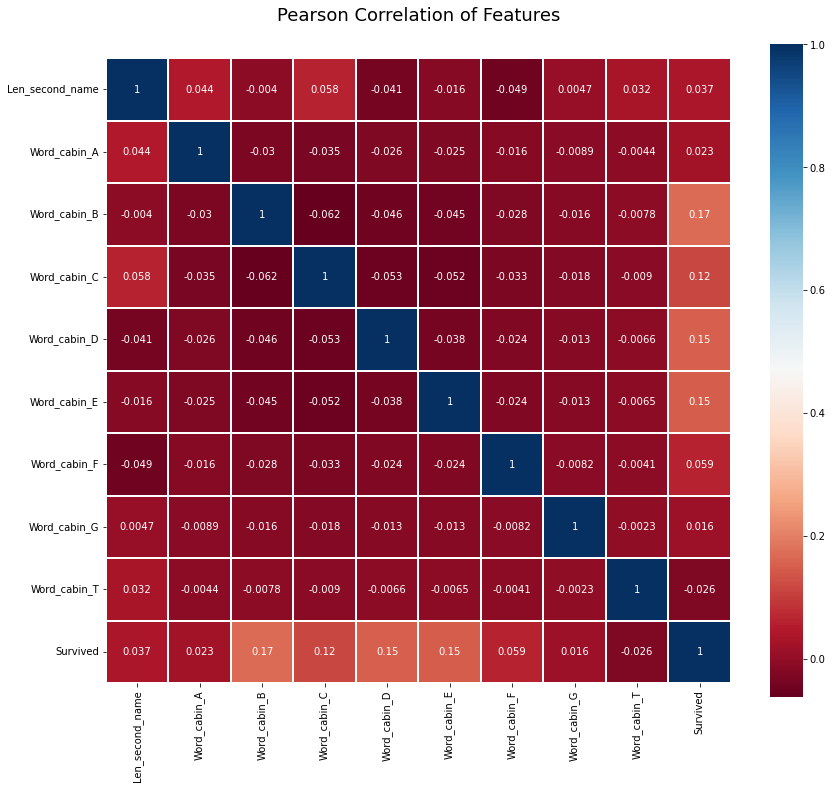

In [79]:
new_features = Data[['Len_second_name', 'Word_cabin_A', 'Word_cabin_B', 'Word_cabin_C',
       'Word_cabin_D', 'Word_cabin_E', 'Word_cabin_F', 'Word_cabin_G',
       'Word_cabin_T', 'Survived']]

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(new_features.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Видно, что какая-то корреляция между выживаемостью и людьми, которые находились в кабине B, C, D, E есть.
Можно предположить, что эти кабины находились ближе всего к лодкам-спасателям.

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

Необязательно, так как очень важно какую корреляцию мы измеряли. Формула Пирсона измеряет линейную корреляцию, а между признаками может существовать так же нелинейная зависимость. 
Можно так же смотреть на графики, которую эту зависимость показывают

# Бонус.

**Задание 16*.** Мы провели довольно подробный однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет. 

a) Попробуйте написать свою модель для предсказания выживаемости, используя обнаруженные закономерности. 

b) Оцените качество модели - вычислите долю правильных ответов алгоритма по всем данным.

In [88]:
import numpy as np

In [99]:
def prediction(x):
    return x['Sex']

In [98]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

0.7873303167420814

In [ ]:
Data.drop('Age', inplace=True, axis=1)
Data

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,AgeBin_Code
0,0,3,Braund; Mr. Owen Harris,0,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]",1
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]",2
2,1,3,Heikkinen; Miss. Laina,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]",1
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,1,0,113803,53.1000,C123,S,"(32.0, 48.0]",2
4,0,3,Allen; Mr. William Henry,0,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]",2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Montvila; Rev. Juozas,0,0,0,211536,13.0000,NaN,S,"(16.0, 32.0]",1
887,1,1,Graham; Miss. Margaret Edith,1,0,0,112053,30.0000,B42,S,"(16.0, 32.0]",1
888,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",1,1,2,W./C. 6607,23.4500,NaN,S,"(16.0, 32.0]",1
889,1,1,Behr; Mr. Karl Howell,0,0,0,111369,30.0000,C148,C,"(16.0, 32.0]",1


**Задание 17.***

Разобъем данные на тренировочную и тестовую часть с помощью train_test_split.

2) Обучите KNN на тренировочной части, сделайте предсказание на тесте и вычислите долю правильных ответов.

3) С помощью написанной вами раннее модели сделайте предсказание на тесте и оцените его качество.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

y = Data['Survived']
X = Data._get_numeric_data().drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X

,Pclass,Sex,SibSp,Parch,Fare,AgeBin_Code
0,3,0,1,0,7.2500,1
1,1,1,1,0,71.2833,2
2,3,1,0,0,7.9250,1
3,1,1,1,0,53.1000,2
4,3,0,0,0,8.0500,2
...,...,...,...,...,...,...
886,2,0,0,0,13.0000,1
887,1,1,0,0,30.0000,1
888,3,1,1,2,23.4500,1
889,1,0,0,0,30.0000,1


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.746606334841629